In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ramen-ratings/ramen-ratings.csv


In [2]:
df = pd.read_csv('/kaggle/input/ramen-ratings/ramen-ratings.csv')

In [3]:
df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [4]:
df = df.drop(columns=['Top Ten'])

In [5]:
df.isnull().sum()

Review #    0
Brand       0
Variety     0
Style       2
Country     0
Stars       0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

Review #    0
Brand       0
Variety     0
Style       0
Country     0
Stars       0
dtype: int64

In [8]:
df.describe()

,Review #
count,2578.000000
mean,1291.281614
std,744.675068
min,1.000000
25%,647.250000
50%,1291.500000
75%,1935.750000
max,2580.000000


In [9]:
x = df.drop(columns=['Style'])
x

,Review #,Brand,Variety,Country,Stars
0,2580,New Touch,T's Restaurant Tantanmen,Japan,3.75
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Taiwan,1
2,2578,Nissin,Cup Noodles Chicken Vegetable,USA,2.25
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Taiwan,2.75
4,2576,Ching's Secret,Singapore Curry,India,3.75
...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Vietnam,3.5
2576,4,Wai Wai,Oriental Style Instant Noodles,Thailand,1
2577,3,Wai Wai,Tom Yum Shrimp,Thailand,2
2578,2,Wai Wai,Tom Yum Chili Flavor,Thailand,2


In [10]:
y = df['Style']
y

0        Cup
1       Pack
2        Cup
3       Pack
4       Pack
        ... 
2575    Bowl
2576    Pack
2577    Pack
2578    Pack
2579    Pack
Name: Style, Length: 2578, dtype: object

# Bar Plot

Text(0, 0.5, 'Frequency')

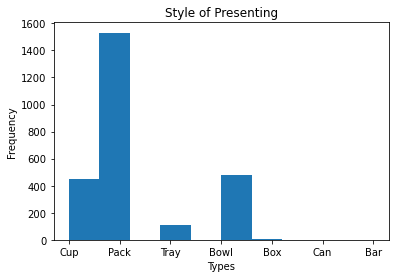

In [11]:
import matplotlib.pyplot as plt
# create figure and axis
fig, ax = plt.subplots()
# plot histogram
ax.hist(df['Style'])
# set title and labels
ax.set_title('Style of Presenting')
ax.set_xlabel('Types')
ax.set_ylabel('Frequency')

Label encoding to convert string to numeric type

In [12]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()  
x= x.apply(label_encoder.fit_transform)
x

,Review #,Brand,Variety,Country,Stars
0,2577,190,2187,18,36
1,2576,119,1441,32,6
2,2575,192,453,35,15
3,2574,336,707,32,18
4,2573,38,1952,16,36
...,...,...,...,...,...
2575,4,329,848,37,31
2576,3,332,1509,33,6
2577,2,332,2250,33,12
2578,1,332,2246,33,12


In [13]:
y= label_encoder.fit_transform(y)
y

array([4, 5, 4, ..., 5, 5, 5])

# Joint Plot

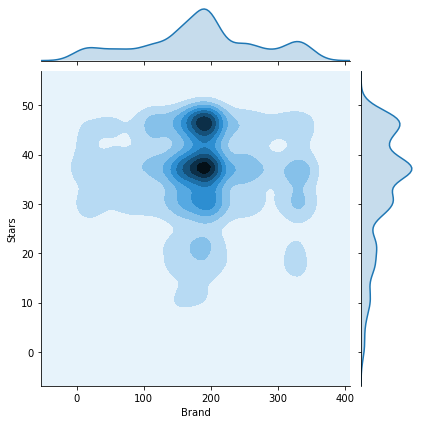

In [14]:
import seaborn as sns
sns.jointplot(x=x['Brand'], y=x['Stars'], kind="kde")

# Box Plot

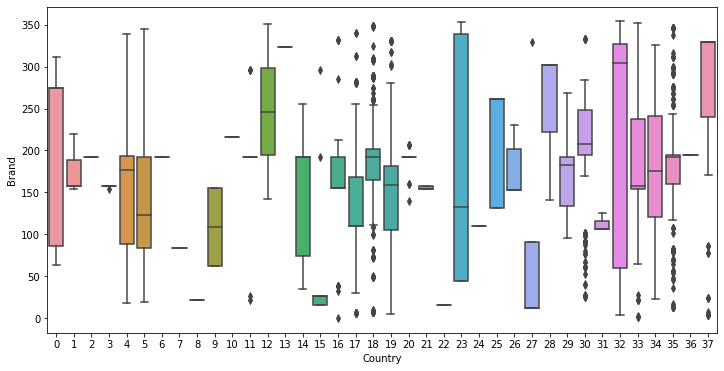

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Country", y="Brand", data=x)

# Count Plot

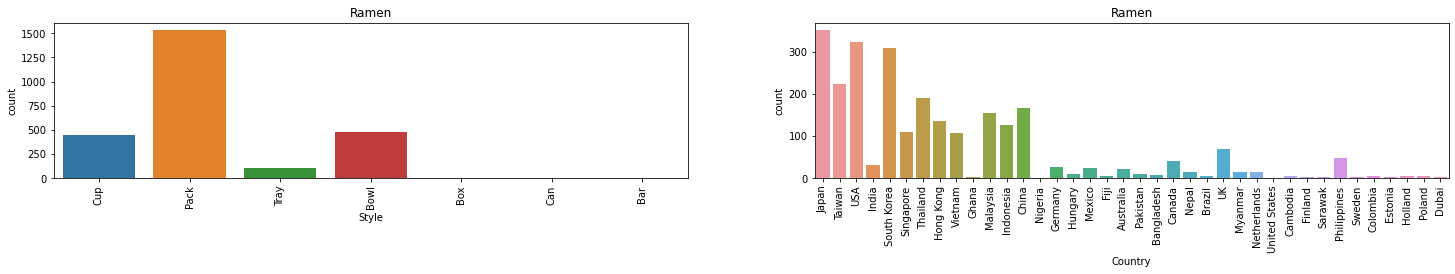

In [16]:
features=['Style', 'Country'] # Subplot for count plot
fig=plt.subplots(figsize=(25,20))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df)
    plt.xticks(rotation=90)
    plt.title("Ramen")
    
plt.show()

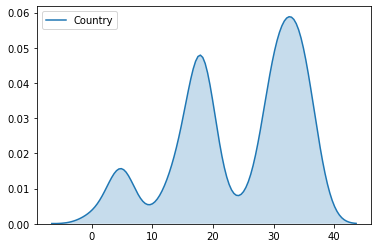

In [17]:
import seaborn as sns
sns.kdeplot(data=x['Country'], shade=True)

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [20]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
X_train_norm = norm.transform(x_train)


# transform testing dataabs
X_test_norm = norm.transform(x_test)


In [21]:
# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
X_train_norm = norm.transform(x_train)
print("Scaled Train Data: \n\n")
print(X_train_norm)

Scaled Train Data: 


[[0.36515328 0.93767705 0.62655602 0.89189189 0.44      ]
 [0.01008925 0.54107649 0.24854772 0.48648649 0.76      ]
 [0.66278619 0.26345609 0.96929461 0.51351351 0.76      ]
 ...
 [0.03492433 0.06515581 0.51410788 1.         0.36      ]
 [0.93247963 0.74504249 0.90580913 0.13513514 0.04      ]
 [0.55529686 0.43626062 0.34647303 0.51351351 0.62      ]]


In [22]:
# transform testing dataabs
X_test_norm = norm.transform(x_test)
print("\n\nScaled Test Data: \n\n")
print(X_test_norm)



Scaled Test Data: 


[[0.73535118 0.45609065 0.85809129 0.13513514 0.44      ]
 [0.53938688 0.68271955 0.75062241 0.51351351 0.84      ]
 [0.44237485 0.04249292 0.74647303 0.59459459 0.84      ]
 ...
 [0.56266977 0.54107649 0.43112033 0.78378378 0.94      ]
 [0.16336826 0.55240793 0.7879668  0.81081081 0.44      ]
 [0.64105549 0.0509915  0.03485477 0.13513514 0.44      ]]


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [24]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf.fit(X_train_norm,y_train)

DecisionTreeClassifier()

In [25]:
#Predict the response for test dataset
y_pred = clf.predict(X_test_norm)


print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.6201550387596899


In [26]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train_norm, y_train)  

KNeighborsClassifier()

In [27]:
y_pred= classifier.predict(X_test_norm)  
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
confusion_matrix(y_test, y_pred) 

array([[ 35,   0,   0,   8,  54,   1],
       [  2,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0],
       [ 15,   0,   0,  48,  44,   1],
       [ 40,   0,   0,  37, 211,   1],
       [  4,   0,   0,   4,   9,   1]])

In [28]:
print(accuracy_score(y_test, y_pred))

0.5717054263565892


In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, n_init = 10, random_state=251)
kmeans.fit(x)

KMeans(n_clusters=4, random_state=251)

In [30]:
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(x) )

In [31]:
centroid_df = pd.DataFrame(centroids, columns = list(x) )
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

In [32]:
snail_df_labeled = x.join(df_labels)

In [33]:
df_analysis = (snail_df_labeled.groupby(['labels'] , axis=0)).head(4177) 
df_analysis.head()

,Review #,Brand,Variety,Country,Stars,labels
0,2577,190,2187,18,36,0.0
1,2576,119,1441,32,6,0.0
2,2575,192,453,35,15,2.0
3,2574,336,707,32,18,2.0
4,2573,38,1952,16,36,0.0


In [34]:
df_analysis.isnull().sum()

Review #    0
Brand       0
Variety     0
Country     0
Stars       0
labels      2
dtype: int64

In [35]:
df_analysis = df_analysis.dropna()

In [36]:
df_analysis.isnull().sum()

Review #    0
Brand       0
Variety     0
Country     0
Stars       0
labels      0
dtype: int64

In [37]:
from sklearn.model_selection import train_test_split  

X= df_analysis.drop('labels',axis =1)
y= df_analysis['labels']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [38]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=0)

In [39]:
# predict Model
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
print('Confusion Matrix \n',cm)
accuracy_score(y_test,y_pred)

Confusion Matrix 
 [[188   9   8   4]
 [ 11 120  26  36]
 [ 15   5 168   0]
 [ 22  24   0 137]]


0.7930142302716688

In [40]:
# DTfrom sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini',random_state = 0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
print('Confusion Matrix \n',cm)
print(accuracy_score(y_test,y_pred))

Confusion Matrix 
 [[206   0   1   2]
 [  0 162   0  31]
 [  1   2 185   0]
 [  0  28   0 155]]
0.9159120310478654


In [41]:
rclf = RandomForestClassifier(n_estimators= 100)
rclf.fit(X_train,y_train)
y_pred = rclf.predict(X_test)
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
print('Confusion Matrix \n',cm)
print(accuracy_score(y_test,y_pred))

Confusion Matrix 
 [[207   0   0   2]
 [  0 163   0  30]
 [  0   2 186   0]
 [  0  28   0 155]]
0.9197930142302717


In [42]:
classifier = KNeighborsClassifier(n_neighbors= 5)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [43]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
print('Confusion Matrix \n',cm)
print(accuracy_score(y_test,y_pred))

Confusion Matrix 
 [[200   0   6   3]
 [  0 157   2  34]
 [  1   1 186   0]
 [  3  30   0 150]]
0.8965071151358344


In [44]:
model = GaussianNB()
model.fit(X_train,y_train)
predicted = model.predict(X_test)
print('Predicted Value',predicted)

Predicted Value [0. 2. 0. 0. 1. 1. 0. 0. 2. 2. 1. 2. 0. 3. 3. 0. 0. 3. 0. 3. 1. 3. 0. 2.
 1. 2. 1. 1. 3. 3. 3. 2. 2. 2. 0. 1. 3. 2. 1. 0. 3. 3. 1. 2. 0. 0. 0. 2.
 2. 2. 0. 0. 0. 2. 1. 2. 2. 0. 3. 0. 1. 3. 3. 3. 3. 3. 1. 1. 3. 1. 2. 1.
 0. 0. 2. 2. 2. 2. 1. 3. 2. 1. 0. 0. 2. 1. 0. 0. 3. 1. 0. 0. 2. 0. 1. 3.
 0. 2. 0. 2. 1. 2. 2. 3. 3. 3. 3. 0. 2. 2. 0. 0. 3. 3. 0. 3. 0. 0. 3. 2.
 1. 0. 1. 1. 3. 1. 2. 3. 3. 1. 1. 3. 1. 1. 1. 3. 2. 2. 0. 1. 3. 2. 0. 0.
 3. 3. 0. 2. 1. 1. 0. 1. 3. 3. 3. 1. 3. 3. 1. 0. 3. 0. 3. 2. 2. 2. 2. 2.
 3. 0. 3. 0. 3. 2. 0. 0. 0. 0. 0. 3. 0. 2. 1. 0. 3. 1. 2. 0. 3. 1. 2. 0.
 0. 2. 1. 1. 2. 3. 0. 3. 2. 1. 0. 2. 2. 0. 0. 1. 1. 2. 3. 0. 3. 1. 3. 0.
 2. 0. 2. 0. 0. 0. 2. 3. 3. 0. 2. 3. 3. 1. 3. 2. 0. 1. 2. 1. 0. 0. 1. 1.
 3. 2. 2. 2. 3. 1. 2. 2. 2. 0. 2. 1. 2. 3. 2. 2. 1. 2. 0. 2. 0. 1. 0. 1.
 1. 0. 2. 1. 3. 1. 1. 3. 1. 1. 2. 0. 2. 2. 2. 2. 2. 3. 1. 1. 1. 3. 0. 3.
 2. 1. 0. 0. 3. 0. 2. 3. 2. 1. 1. 3. 2. 2. 3. 3. 0. 1. 1. 1. 0. 1. 0. 2.
 0. 1. 3. 2. 0. 1. 2. 0. 0. 1. 0. 1

In [45]:
cm = confusion_matrix(y_true=y_test,y_pred=predicted)
print('Confusion Matrix \n',cm)
print(accuracy_score(y_test,predicted))

Confusion Matrix 
 [[203   0   4   2]
 [  0 154   4  35]
 [  0   4 184   0]
 [  8  18   0 157]]
0.9029754204398448
